<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [3]:
#  Replacing nan values in ConvertedComp Col

median = df['ConvertedComp'].median()

"""
df['ConvertedComp'].replace(np.NaN, median)
"""

df['ConvertedComp'] = df['ConvertedComp'].fillna(median)

<AxesSubplot:xlabel='ConvertedComp'>

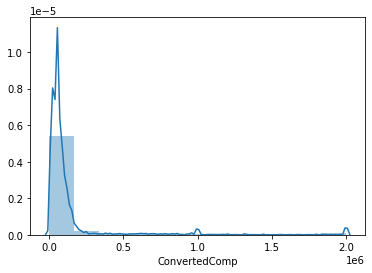

In [4]:
# DISTRIBUTION PLOT OF CONVERTEDCOMP

bins = np.linspace(min(df['ConvertedComp']), max(df['ConvertedComp']), 13)   #div into 12 bins
#group_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
#df['ConvertedComp'] = pd.cut(df['ConvertedComp'], bins, labels=group_names, include_lowest = True, duplicates='drop')

#sns.distplot(df['ConvertedComp'])
sns.distplot(df['ConvertedComp'],kde=True, bins=bins)

In [5]:
# your code goes here
print(df['ConvertedComp'].dtypes)


float64


In [6]:
print(df.dtypes)   #Get idea of data type

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null

Plot the histogram for the column `ConvertedComp`.


Text(0.5, 0, 'Months)')

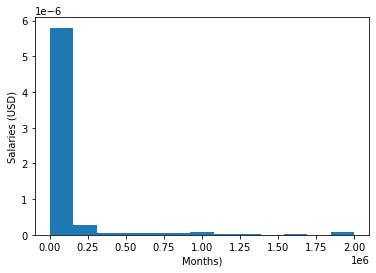

In [8]:
# your code goes here
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

"""
#Use Formula to get number of bins
q25, q75 = np.percentile(df['ConvertedComp'], [25, 75])
bin_width = 2 * (q75 - q25) * len(df['Age']) ** (-1/3)

#Use Formula to get number of bins
bins = abs(round((df['Age'].max() - df['Age'].min()) / bin_width))
"""

plt.hist(df['ConvertedComp'], density=True, bins=13)  # density=False would make counts
plt.ylabel('Salaries (USD)')
plt.xlabel('Months)')

#histConComp = df.hist(column='ConvertedComp', bins=12, grid=False, figsize=(12,6), color='green', zorder=2, rwidth=0.9)


What is the median of the column `ConvertedComp`?



In [9]:
# your code goes here - Column MEDIAN
print('Median of CONVERTEDCOMP Colunn is {}'.format(df['ConvertedComp'].median()))


Median of CONVERTEDCOMP Colunn is 57745.0


#### MEDIAN OF AGE COLUMN

In [10]:
#df['Age'].min()
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,11398.000000,1.058900e+04,1.139800e+04,11276.000000,8972.000000,11111.000000
mean,12490.392437,7.570477e+05,1.263096e+05,42.064606,4.781071,30.778895
std,7235.461999,9.705598e+06,2.846750e+05,24.672741,4.567060,7.393686
min,4.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,16.000000
25%,6264.250000,2.500000e+04,2.901600e+04,40.000000,2.000000,25.000000
50%,12484.000000,6.500000e+04,5.774500e+04,40.000000,4.000000,29.000000
75%,18784.750000,1.200000e+05,9.500000e+04,43.000000,5.000000,35.000000
max,25142.000000,7.000000e+08,2.000000e+06,1012.000000,99.000000,99.000000


In [11]:
#  Replacing nan values in AGE Column

meanAge = df['Age'].mean()

"""
df['ConvertedComp'].replace(np.NaN, median)
"""

df['Age'] = df['Age'].fillna(meanAge)

In [12]:
df['Age'].isna().sum()

0

In [13]:
# your code goes here - Column AGE - Median value
print('Median of AGE Colunn is {}'.format(df['Age'].median()))


Median of AGE Colunn is 29.0


How many responders identified themselves only as a **Man**?


In [14]:
# your code goes here

"""
NumMale = sum(df['Gender'] == "Man")
#print("Number of Man Responders is'.format(NumMale)
NumMale      
"""
NumMResp = df['Gender'].value_counts().head(1)   #number of unique WorkLoc values
NumMResp

print('Number of Only Man/Male Responders is {}'.format(NumMResp))

Number of Only Man/Male Responders is Man    10480
Name: Gender, dtype: int64


In [15]:
NumWom = df['Gender'].value_counts()[1] + df['Gender'].value_counts()[4] + df['Gender'].value_counts()[5]+df['Gender'].value_counts()[6]   #NumMResp[1]+NumMResp[4]+NumMResp[5]+NumMResp[6]
NumWom

756

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [16]:
ConWomResp = df[['ConvertedComp', 'Gender']].groupby(['Gender']).median()
ConWomResp

,ConvertedComp
Gender,
Man,57745.0
"Man;Non-binary, genderqueer, or gender non-conforming",59520.0
"Non-binary, genderqueer, or gender non-conforming",66000.0
Woman,57745.0
Woman;Man,25887.0
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",30244.0
"Woman;Non-binary, genderqueer, or gender non-conforming",65535.5


In [17]:
# your code goes here  -- DELETE

#pokemon_games = df.loc[df['Name'].str.contains("pokemon", case=False)] - 
#https://towardsdatascience.com/check-for-a-substring-in-a-pandas-dataframe-column-4b949f64852


#NumWResp = df.loc[ df['Gender'].str.contains("Woman", case=False, na=False) ]
#NumWResp

df.dropna()[df.dropna()['Gender'].str.contains('Woman', case=False)]
print(df['Gender'].tolist().count('Woman'))

#print('Number of Woman Responders is {}'.format(sum(NumWResp)))
#print('Number of Woman Responders is' + str(sum(NumWResp)))

731


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [18]:
# your code goes here  - TO DELETE
"""
femCnt = np.median(np.sum(df['Gender'] == 'Woman'))
femCnt
print('Number of Woman/Female Responders is {}'.format(femCnt))
"""

"\nfemCnt = np.median(np.sum(df['Gender'] == 'Woman'))\nfemCnt\nprint('Number of Woman/Female Responders is {}'.format(femCnt))\n"

### Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [19]:
# your code goes here - https://machinelearningmastery.com/how-to-calculate-the-5-number-summary-for-your-data-in-python/

df['Age'].describe()

from numpy import percentile

quartiles = percentile(df['Age'], [25, 50, 75])     #Quartiles

Age_min, Age_max = df['Age'].min(), df['Age'].max()     #Min/Max

# print Summaries
print('Min: %.3f' % Age_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % Age_max)

Min: 16.000
Q1: 26.000
Median: 29.000
Q3: 34.000
Max: 99.000


Plot a histogram of the column `Age`.


In [20]:
#df['Age'].dtype

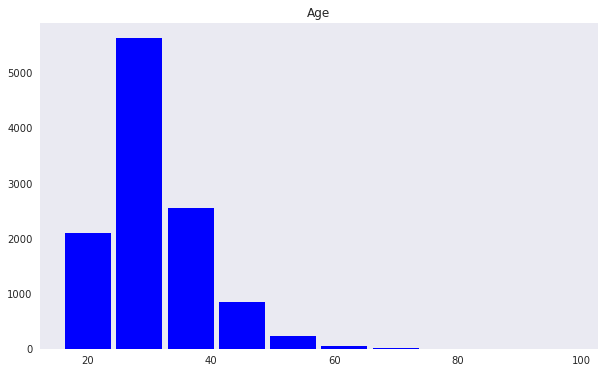

In [58]:
# your code goes here

"""
#Use Formula to get number of bins
q25, q75 = np.percentile(df['Age'], [25, 75])
bin_width = 2 * (q75 - q25) * len(df['Age']) ** (-1/3)

#Use Formula to get number of bins
bins = round((df['Age'].max() - df['Age'].min()) / bin_width)

print("One Possible Number of Bins:", bins)
#plt.hist(x, bins=bins);

plt.hist(df['Age'], density=True, bins=bins)  # density=False would make counts
plt.ylabe
l('Probability')
plt.xlabel('Data');

q25, q75 = np.percentile(df['Age'], [25, 75])
bin_width = 2 * (q75 - q25) * len(df['Age']) ** (-1/3)
bins = round((df['Age'].max() - df['Age'].min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(df['Age'], bins=bins);
"""
bin_width=8
bins = round((df['Age'].max() - df['Age'].min()) / bin_width)
histAge = df.hist(column='Age', bins=bins, grid=False, figsize=(10,6), color='blue', zorder=2, rwidth=0.9)

AttributeError: 'Rectangle' object has no property 'labels'

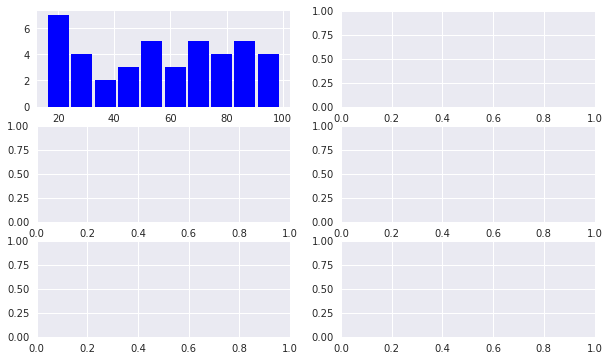

In [60]:
# your code goes here

bins = np.linspace(min(df['Age']), max(df['Age']), 11)   #div into 10 bins

group_names=['16-24', '24-32', '32-40', '40-48', '48-56', '56-64', '64-72', '72-80', '80-88', '88-96']

df['AgeX'] = pd.cut(df['Age'], bins, labels=group_names, include_lowest = True)   #, duplicate='drop')

histAge = df.hist(bins=bins, labels=group_names, grid=False, figsize=(10,6), color='blue', zorder=2, rwidth=0.9)   #, data=df['AgeX'])

#histAge = df.hist(bins=bins, labels=group_names, grid=False, figsize=(10,6), color='blue', zorder=2, rwidth=0.9)   #, data=df['AgeX'])


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [24]:
# Examining for Null values
NumMResp = df['ConvertedComp'].isnull().sum()   #value_counts()   #number of unique WorkLoc values
NumMResp


0

Text(0.5, 0, 'ConvertedComp')

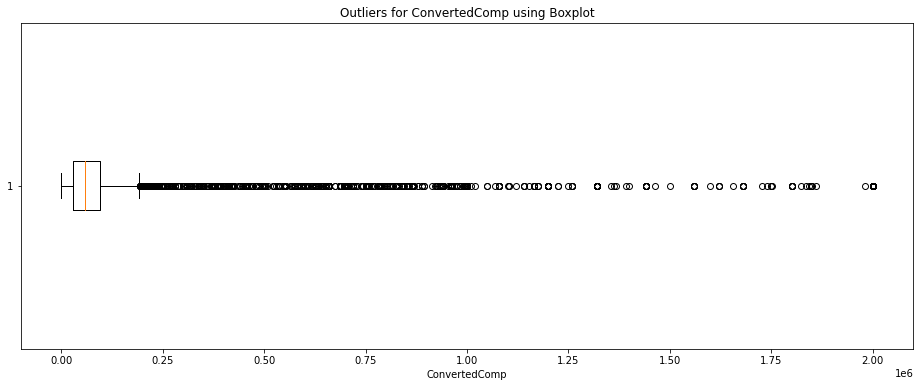

In [25]:
# your code goes 
plt.figure(figsize = (16, 6))
#figure_name = plt.figure(figsize=(width, height))
plt.boxplot(x=df['ConvertedComp'], vert=False)
plt.title('Outliers for ConvertedComp using Boxplot')
plt.xlabel('ConvertedComp')


#Find out the Inter Quartile Range for the column `ConvertedComp`.


In [27]:
# your code goes here
q3, q1 = np.percentile(df['ConvertedComp'], [75 ,25])
IQR = q3 - q1

print('Inter-quartile range for ConvertedComp column: {}'.format(IQR))

Inter-quartile range for ConvertedComp column: 65984.0


Find out the upper and lower bounds.


In [28]:
# your code goes here

"""
print('Uppewr bounds is {}'.format(df['ConvertedComp'] >= (q3 + 1.5*IQR)))
print('Lower bounds is {}'.format(df['ConvertedComp'] >= (q3 - 1.5*IQR)))
"""
uppBounds = print('Upper bounds is {}'.format(q3 + 1.5*IQR))
uppBounds   #print('(Upper Bounds is: " + str(upBounds))

lowBounds = print('Lower bounds is {}'.format(q1 - 1.5*IQR))
lowBounds   #print('(Lower Bounds is: " + str(lowBounds))

Upper bounds is 193976.0
Lower bounds is -69960.0


Identify how many outliers are there in the `ConvertedComp` column.


In [29]:
# your code goes here

"""
amtOutlier = ((df['ConvertedComp'] < (q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (q3 + 1.5 * IQR))).sum() 
amtOutlier
#https://stackoverflow.com/questions/39068214/how-to-count-outliers-for-all-columns-in-pyth"
"""

lowSum = (df['ConvertedComp'] <= (q1 - 1.5 * IQR)).sum()
print('Number of Outliers below Q1 is {}'.format(lowSum))
      
uppSum = (df['ConvertedComp'] >= (q3 + 1.5 * IQR)).sum() 
print('Numberr of Outliers above Q3 is {}'.format(uppSum))
      
numOutlier = lowSum + uppSum   #= sum(a, b)
print('Total Outliers are {}'.format(numOutlier))

Number of Outliers below Q1 is 0
Numberr of Outliers above Q3 is 933
Total Outliers are 933


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [30]:
# your code goes here
# METHOD 1

"""
cols = ['col_1', 'col_2'] # one or more

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
https://www.codegrepper.com/code-examples/python/remove+outlier+columns+pandas
"""
#METHOLD 2
"""
https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

#IQR = Q3 - Q1
"""

upper = np.where(df['ConvertedComp'] >= (q3 + 1.5*IQR))   #Upper bound   
lower = np.where(df['ConvertedComp'] <= (q1 - 1.5*IQR))   #Lower bound

dfNew = df.loc[(df['ConvertedComp'] >= lower) & (df['ConvertedComp'] <= upper)]

"""
#dfNew = df.copy()   #Make copy of original df
#dfNew

new_df = df[filtered_entries]
df['ConvertedComp'].drop(upper[0], inplace = True)
df['ConvertedComp'].drop(lower[0], inplace = True)
 
print("New Data now have Shape: ", df.shape)
"""

ValueError: operands could not be broadcast together with shapes (11398,) (1,0) 

In [ ]:
# dfNew shape before dropping Outliers

dfNew.shape

In [ ]:
# Removing Outliers

dfNew['ConvertedComp'].drop(upper[0], inplace = True)
dfNew['ConvertedComp'].drop(lower[0], inplace = True)
 
print("New Data now have Shape: ", dfNew.shape)
print("Orig Data now have Shape: ", df.shape)

In [ ]:
dfNew['ConvertedComp']

In [ ]:
dfNew['ConvertedComp'].isnull().sum()

In [ ]:
# your code goes here - Column MEAN AFTER DROPPING OUTLIERS

print('CONVERTEDCOMP Mean After Dropping Outliers {}'.format(dfNew['ConvertedComp'].mean()))


In [ ]:
dfNew.describe()

In [31]:
# your code goes here - Column MEDIAN
print('Median of CONVERTEDCOMP Colunn is {}'.format(df['ConvertedComp'].median()))


Median of CONVERTEDCOMP Colunn is 57745.0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [32]:
df['Respondent'].isna().sum()   #number of missing values in WorkWeekHrs

0

In [33]:
df['CompTotal'].isna().sum()   #number of missing values in WorkWeekHrs

809

In [34]:
# your code goes here

meanCompTot = df['CompTotal'].mean()

df['CompTotal'].replace(np.nan, meanCompTot, inplace=True)

In [35]:
df['ConvertedComp'].isna().sum()   #number of missing values in WorkWeekHrs

0

In [36]:
df['WorkWeekHrs'].isna().sum()   #number of missing values in WorkWeekHrs

122

In [37]:
# your code goes here

meanworkHrs = df['WorkWeekHrs'].mean()

df['WorkWeekHrs'].replace(np.nan, meanworkHrs, inplace=True)

In [39]:
df['CodeRevHrs'].isna().sum()   #number of missing values in WorkWeekHrs

2426

In [40]:
# your code goes here

meanCodeHrs = df['CodeRevHrs'].mean()

df['CodeRevHrs'].replace(np.nan, meanCodeHrs, inplace=True)

In [48]:
"""import plotly.express as px
z = df[['Respondent', 'CompTotal', 'WorkWeekHrs', 'CodeRevHrs']]

fig = px.imshow(z, text_auto=True)
fig.show()"""

"import plotly.express as px\nz = df[['Respondent', 'CompTotal', 'WorkWeekHrs', 'CodeRevHrs']]\n\nfig = px.imshow(z, text_auto=True)\nfig.show()"

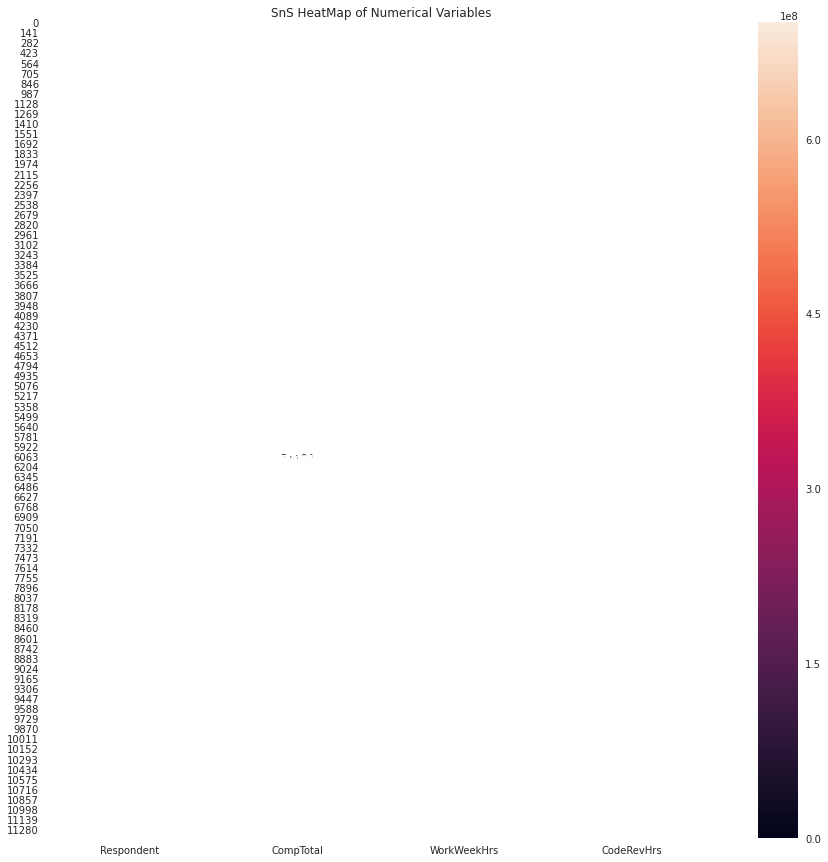

In [55]:
# Correlation Using HeatMap
#Import Modules

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use("seaborn")
 
z = df[['Respondent', 'CompTotal', 'WorkWeekHrs', 'CodeRevHrs']]

# Plot the heatmap
plt.figure(figsize=(15,15))
heat_map = sns.heatmap(z, linewidth=1, annot=True)
plt.title( "SnS HeatMap of Numerical Variables" )
plt.show()

In [44]:
# your code goes here - CORRELATION BETWEEN AGE AND WORKWEEKHRS

from scipy import stats
from scipy.stats.stats import pearsonr


In [56]:
"""
# your code goes here - CORRELATION BETWEEN AGE AND WORKWEEKHRS

pearson_coef, p_value = stats.pearsonr(df['WorkWeekHrs'], df['Age'])

#print('Correlation between Age and WorkWeekHrs is {}',format(df['WorkWeekHrs'].corr()['Age']))

print('Pearson Coeff between WorkWeekHrs & Age is {}'.format(pearson_coef))

print('P-Value betwen WorkWeekHrs & Age is {}'.format(p_value))
"""

#df[['Age', 'WorkWeekHrs']].corr()

"\n# your code goes here - CORRELATION BETWEEN AGE AND WORKWEEKHRS\n\npearson_coef, p_value = stats.pearsonr(df['WorkWeekHrs'], df['Age'])\n\n#print('Correlation between Age and WorkWeekHrs is {}',format(df['WorkWeekHrs'].corr()['Age']))\n\nprint('Pearson Coeff between WorkWeekHrs & Age is {}'.format(pearson_coef))\n\nprint('P-Value betwen WorkWeekHrs & Age is {}'.format(p_value))\n"

In [51]:
# Correlation Using Corr Function

df.corr()['Age']

Respondent       0.003991
CompTotal        0.006732
ConvertedComp    0.101822
WorkWeekHrs      0.036311
CodeRevHrs      -0.017042
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja

## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
